<a href="https://colab.research.google.com/github/s0m5/CNN-mask-dataset/blob/main/CNN_on_a_mask_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/



In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d ashishjangra27/face-mask-12k-images-dataset


 99% 327M/330M [00:06<00:00, 91.6MB/s]
100% 330M/330M [00:06<00:00, 53.5MB/s]


In [ ]:
! unzip face-mask-12k-images-dataset.zip

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
dataset_dir = '/content/Face Mask Dataset/Train'


datagen = ImageDataGenerator(rescale=1.0/255.0)


batch_size = 32
train_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(64, 64),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)


Found 10000 images belonging to 2 classes.


In [ ]:
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(2, activation='softmax')
])


In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
epochs = 10
history = model.fit(
    train_generator,
    epochs=epochs
)

Epoch 1/10
313/313 [==============================] - 71s 216ms/step - loss: 0.0858 - accuracy: 0.9674
Epoch 2/10
313/313 [==============================] - 67s 213ms/step - loss: 0.0419 - accuracy: 0.9857
Epoch 3/10
313/313 [==============================] - 80s 254ms/step - loss: 0.0311 - accuracy: 0.9887
Epoch 4/10
 50/313 [===>..........................] - ETA: 58s - loss: 0.0212 - accuracy: 0.9937

Found 992 images belonging to 2 classes.
31/31 - 3s - loss: 0.0272 - accuracy: 0.9889 - 3s/epoch - 84ms/step
Test accuracy: 0.9889112710952759
31/31 [==============================] - 2s 74ms/step


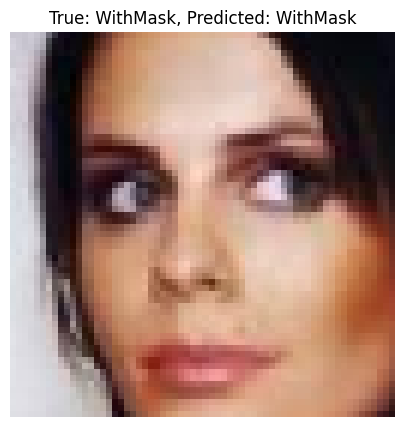

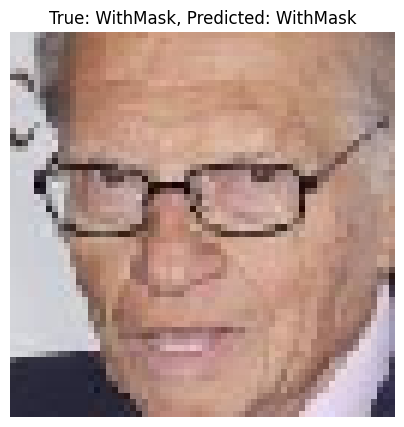

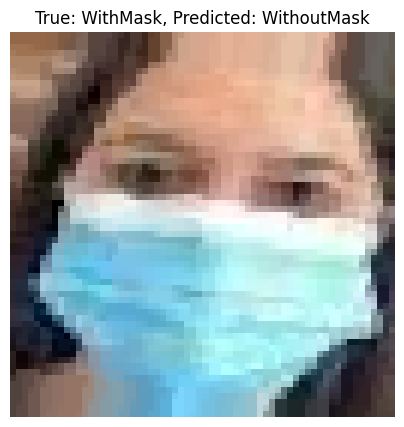

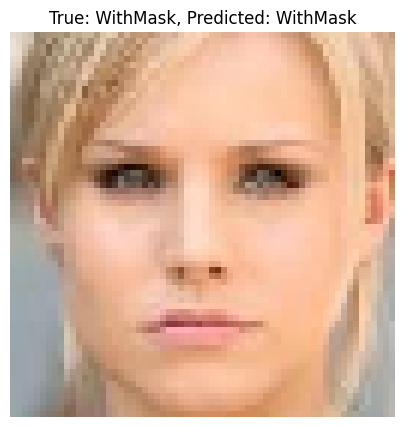

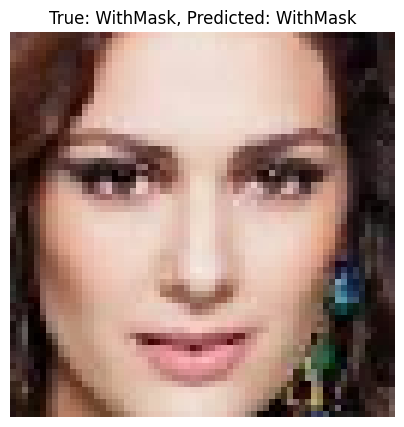

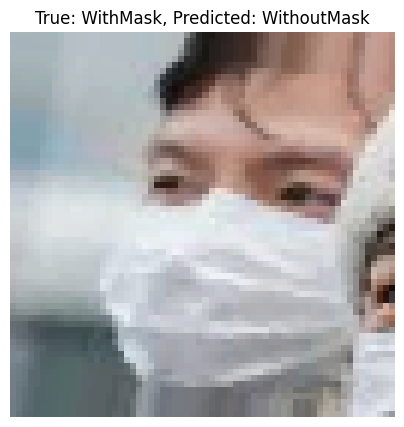

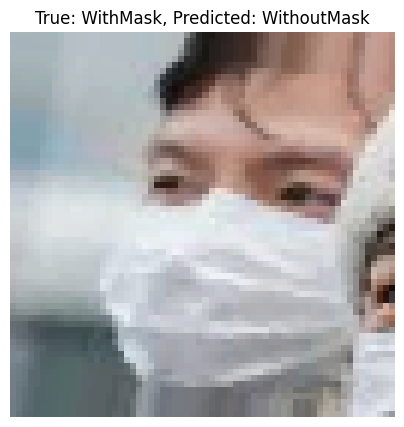

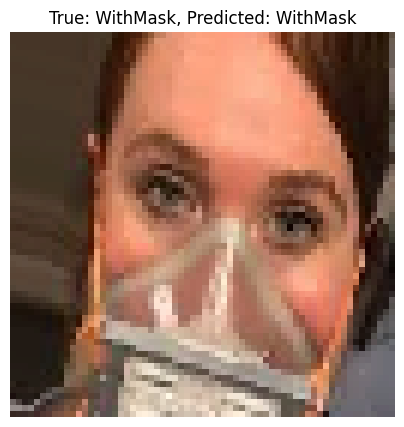

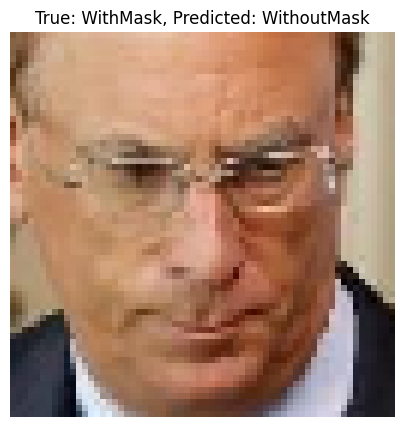

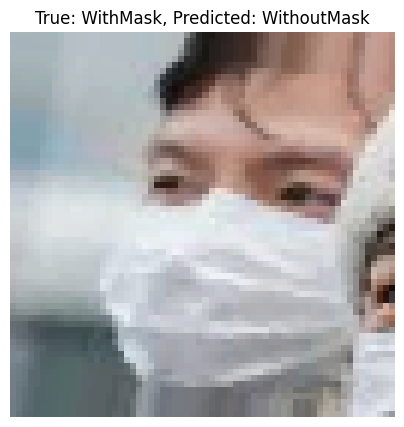

In [ ]:

test_dir = '/content/Face Mask Dataset/Test'

test_datagen = ImageDataGenerator(rescale=1.0/255.0)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(64, 64),
    batch_size=batch_size,
    class_mode='categorical'
)


test_loss, test_accuracy = model.evaluate(test_generator, verbose=2)
print(f'Test accuracy: {test_accuracy}')

predicted_labels = model.predict(test_generator)


true_labels = test_generator.classes


class_names = list(test_generator.class_indices.keys())


num_images_to_display = 10
indices = np.random.choice(len(test_generator), num_images_to_display)
for i in indices:
    image = test_generator[i][0][0]
    true_label = class_names[true_labels[i]]
    predicted_label = class_names[np.argmax(predicted_labels[i])]

    # Display the image
    plt.figure(figsize=(5, 5))
    plt.imshow(image)
    plt.title(f'True: {true_label}, Predicted: {predicted_label}')
    plt.axis('off')
    plt.show()
